# Stationarity
A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. 
But why is it important? Most of the TS models work on the assumption that the TS is stationary. 
Intuitively, we can say that if a TS has a particular behaviour over time, there is a very high probability 
that it will follow the same in the future. Also, the theories related to stationary series are more mature 
and easier to implement as compared to non-stationary series.

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime

In [4]:
# The data contains a particular month and number of passengers travelling in that month.
#  data = pd.read_csv('resources/AirPassengers.csv')
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('resources/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)
print(data.head())
print('\n Data Types:')
print(data.dtypes)


            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

 Data Types:
#Passengers    int64
dtype: object


In [6]:
data.index
type(data)

pandas.core.frame.DataFrame

In [9]:
ts = data['#Passengers']
ts.head(10)
type(ts)
ts.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

# Data Exploration

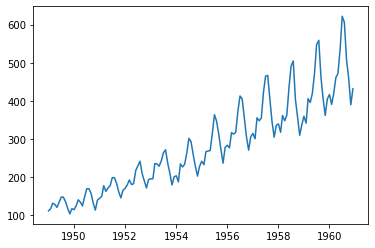

In [10]:
plt.plot(ts)

In [ ]:
ts.loc['1954-01-01':'1954-12-01']
plt.plot(ts.loc['1954-01-01':'1954-12-01'])

In [ ]:
plt.plot(ts.loc['1958-01-01':'1958-12-01'])

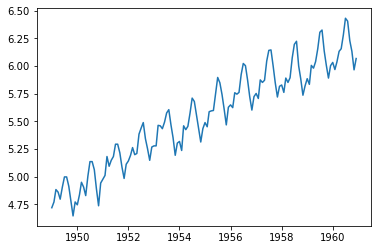

In [15]:
ts_log = np.log(ts)
plt.plot(ts_log)

# Simple Stationarity measures
### "mean, variance remain constant over time"

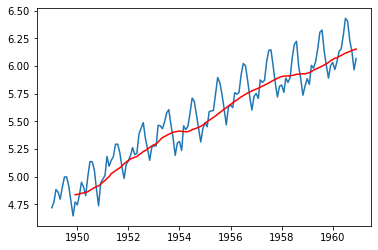

In [19]:
plt.plot(ts_log)
plt.plot(ts_log.rolling(12).mean(), color='red')
# plt.plot(ts_log.rolling(12).std(), color='black')

In [21]:
ts_log_moving_avg_diff = ts_log - ts_log.rolling(12).mean()
# ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: #Passengers, Length: 144, dtype: float64

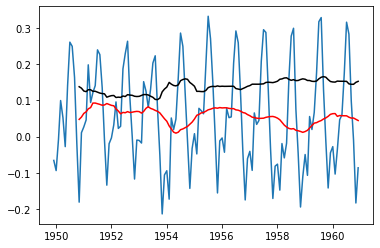

In [22]:
plt.plot(ts_log_moving_avg_diff)
plt.plot(ts_log_moving_avg_diff.rolling(12).mean(), color='red')
plt.plot(ts_log_moving_avg_diff.rolling(12).std(), color='black')

## Stationarity is a term of art with precise definitions and tests
* https://www.statsmodels.org/stable/tsa.html
* https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test

In [27]:
from statsmodels.tsa.stattools import adfuller
ts_log_moving_avg_diff.dropna(inplace=True)
dftest = adfuller(ts_log_moving_avg_diff, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value# 
print(dfoutput)
dftest

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


(-3.162907991300852,
 0.022234630001244236,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747125)

## Put it all together

In [28]:
def test_stationarity(timeseries):    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

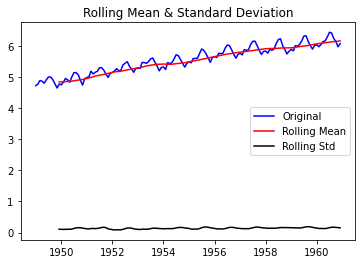

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [29]:
test_stationarity(ts_log)

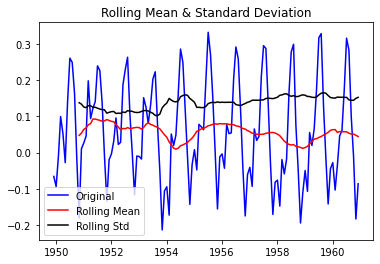

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [30]:
test_stationarity(ts_log_moving_avg_diff)

# More sophistocated stationarity measures

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [32]:
trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

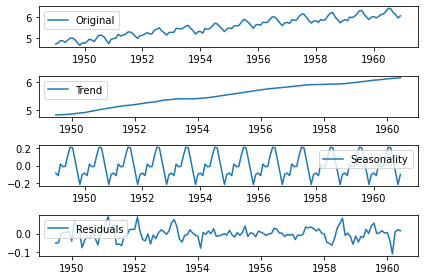

In [33]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

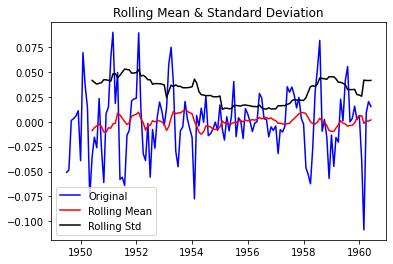

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [34]:
test_stationarity(residual.dropna(inplace=False))

# More sophisticated approaches

In [35]:
import statsmodels.tsa

In [36]:
dir(statsmodels.tsa)

['PytestTester',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bds',
 '_innovations',
 '_stl',
 'adfvalues',
 'ar_model',
 'arima_model',
 'arima_process',
 'base',
 'deterministic',
 'filters',
 'kalmanf',
 'seasonal',
 'stattools',
 'test',
 'tsatools',
 'vector_ar']